In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [86]:
df = pd.read_csv('AB_NYC_2019.csv')

In [87]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 16)

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
df.var()

id                                1.206287e+14
host_id                           6.179684e+15
latitude                          2.973529e-03
longitude                         2.130444e-03
price                             5.767403e+04
minimum_nights                    4.206826e+02
number_of_reviews                 1.984754e+03
reviews_per_month                 2.823885e+00
calculated_host_listings_count    1.085868e+03
availability_365                  1.732443e+04
dtype: float64

# Visualization

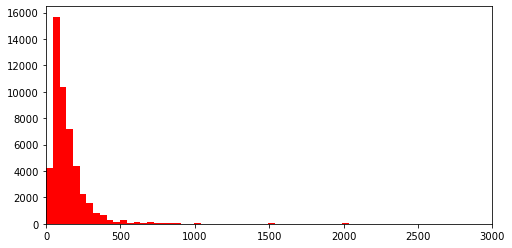

In [112]:
n_bins = np.sqrt(len(df.price))
n_bins = int(n_bins)

plt.figure(figsize=(8, 4))
plt.xlim(right=3000)
plt.hist(df.price, bins=n_bins, color='red');

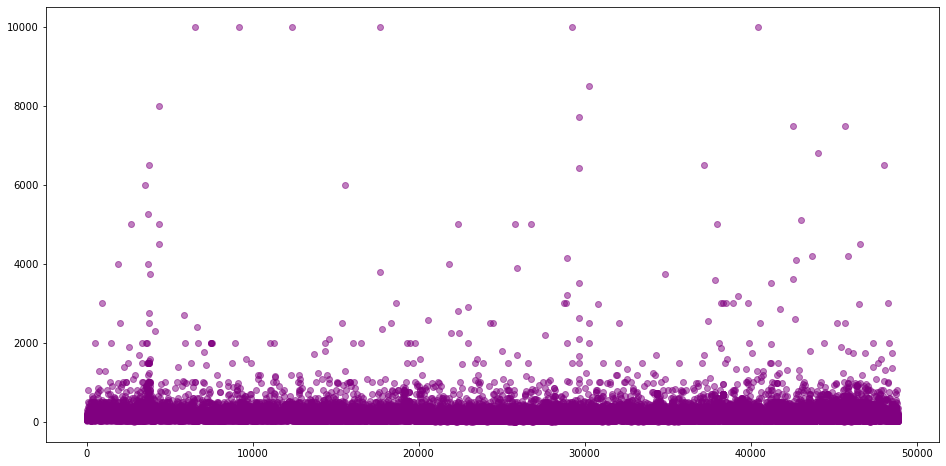

In [15]:
integers = range(len(df['price']))

plt.figure(figsize=(16, 8))
plt.scatter(integers, df['price'], c='purple', alpha=0.5)

## Flexibel Method
### BoxPlot

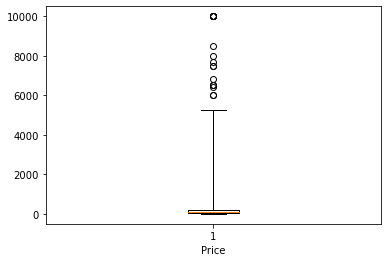

In [21]:
plt.boxplot(df['price'], whis=50)
plt.xlabel("Price");

In [26]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

IQR = q3 - q1

# calculate the limit
lower_limit = q1 - 3*IQR
upper_limit = q3 + 3*IQR

# create mask

is_lower = df['price'] < lower_limit
is_upper = df['price'] > upper_limit

# filter
outlier = df['price'][is_lower | is_upper]

In [28]:
len(outlier)

1328

# Z score Algorithem for Anomaly Detection

In [106]:
from scipy.stats import zscore, median_abs_deviation

In [40]:
scores = zscore(df['price'])

In [58]:
df['price_scores'] = zscore(df['price'])

In [66]:
df[(df['price_scores'] > 3) | (df['price_scores'] < -3)].shape

(388, 17)

In [89]:
def zscore_detection(df, col, threshold=3):
    scores = zscore(df[col])
    df[f'{col}_zscores'] = zscore(df[col])
    outliers_df = df[(df[f'{col}_zscores'] > threshold) | (df[f'{col}_zscores'] < -threshold)]
    return outliers_df
    

In [90]:
out_liers = zscore_detection(df, 'price')

In [91]:
out_liers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,pricezscores
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0,7.692135
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,2018-09-25,0.31,4,297,4.777311
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,NaN,NaN,1,365,11.856169
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,NaN,NaN,1,0,4.777311
1414,634353,Luxury 1Bed with Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77428,-73.98594,Entire home/apt,1000,30,44,2015-09-28,0.53,11,364,3.528100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48301,36186719,Private Bedroom in the Heart of Chelsea!,268920555,Terrence Jake,Manhattan,Chelsea,40.74531,-73.99454,Private room,999,30,0,NaN,NaN,1,270,3.523936
48304,36189195,Next to Times Square/Javits/MSG! Amazing 1BR!,270214015,Rogelio,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,NaN,NaN,1,222,11.852005
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,NaN,NaN,1,270,7.687971
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,NaN,NaN,1,349,5.064629


In [102]:
outliers_minimum_nights = zscore_detection(df, 'minimum_nights', threshold=5)

In [103]:
outliers_minimum_nights.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,pricezscores,minimum_nightszscores
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.12,1,180,0.925579,8.433309
245,61509,"Quiet, clean midtown apt w. elevato",23619,Anna/Fonzy,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,92,2019-04-30,0.90,1,140,-0.177890,9.408427
667,253332,"Spacious, modern loft in awesome neighborhood",552343,Cynthia,Brooklyn,Sunset Park,40.66230,-73.99049,Entire home/apt,96,120,13,2018-09-01,0.14,1,204,-0.236187,5.507955
700,258690,CHELSEA 1 Bdrm Plus Sleeping Loft!!,1359611,Andrea,Manhattan,Chelsea,40.74618,-74.00392,Entire home/apt,195,365,10,2014-10-26,0.12,1,0,0.176053,17.453150
719,263502,Prime Williamsburg 1/BD New Condo,1382749,Shaun,Brooklyn,Williamsburg,40.72059,-73.95670,Entire home/apt,185,180,24,2015-08-19,0.26,1,0,0.134412,8.433309


In [143]:
df.select_dtypes(include='number')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,pricezscores,minimum_nightszscores
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365,-0.015493,-0.293996
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355,0.300974,-0.293996
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365,-0.011329,-0.196484
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194,-0.265335,-0.293996
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0,-0.302811,0.144807
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,40.67853,-73.94995,70,2,0,NaN,2,9,-0.344452,-0.245240
48891,36485057,6570630,40.70184,-73.93317,40,4,0,NaN,2,36,-0.469373,-0.147729
48892,36485431,23492952,40.81475,-73.94867,115,10,0,NaN,1,27,-0.157070,0.144807
48893,36485609,30985759,40.75751,-73.99112,55,1,0,NaN,6,2,-0.406912,-0.293996


In [145]:
df_num = df[['latitude','price', 'minimum_nights','number_of_reviews']]

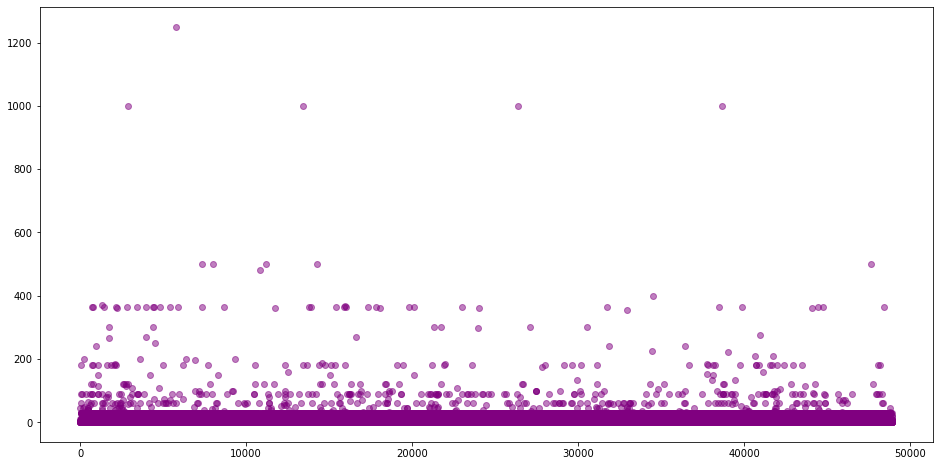

In [105]:
integers = range(len(df['minimum_nights']))

plt.figure(figsize=(16, 8))
plt.scatter(integers, df['minimum_nights'], c='purple', alpha=0.5);

# MAD score _modified z-score in code

The MAD algorithm is commonly used for this type of anomaly detection because it’s highly effective and efficient. 

In [108]:
"""Median Absolute Deviation: for measuring the distances between
    data points and the median in terms of median distance."""

mad_score_price = median_abs_deviation(df['price'])
mad_score_price

46.0

In [113]:
from pyod.models.mad import MAD

In [129]:
"""threshold : float, optional (default=3.5)
   The modified z-score to use as a threshold. Observations with
   a modified z-score (based on the median absolute deviation) greater
   than this value will be classified as outliers."""
mad = MAD(threshold=10)

In [130]:
df['price'].values.shape

(48895,)

In [131]:
price_reshaped = df['price'].values.reshape(-1,1)

In [132]:
price_reshaped.shape

(48895, 1)

In [133]:
labels = mad.fit_predict(price_reshaped)

In [134]:
type(labels)

numpy.ndarray

In [135]:
labels.sum()

502

# Anomaly Detection with PYOD and IForest

In [137]:
from pyod.models.iforest import IForest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [163]:
def evaluate_outlier_classifier(model, data):
    
    #get labels
    labels = model.fit_predict(data)
    
    #return inliers
    inliers = data[labels == 0]
    return inliers
    
    
def evaluate_regresor(inliers):
    
    X = inliers.drop(columns=['price'])
    y = inliers['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    return rmse
    
    
    
    
    

In [172]:
contaminations = [0.05, 0.1, 0.2, 0.3]

scores = dict()
for c in contaminations:
    
    iforest = IForest(contamination=c)
    inliers = evaluate_outlier_classifier(iforest, df_num)
    
    scores[c] = evaluate_regresor(inliers)

In [173]:
scores

{0.05: 98.25197847153878,
 0.1: 89.17166105780069,
 0.2: 77.12559627259937,
 0.3: 72.10221749352361}

### Fix contamination=0.3 and find n estimators and max samples

In [174]:
from itertools import product

In [175]:
estimators = [100, 200, 300]
max_samples = [0.6, 0.8, 1]

scores = dict()
for es, ms in product(estimators, max_samples):
    
    iforest = IForest(n_estimators= es, max_samples= ms, contamination=0.3)
    inliers = evaluate_outlier_classifier(iforest, df_num)
    
    scores[(es, ms)] = evaluate_regresor(inliers)


In [176]:
scores

{(100, 0.6): 77.68208052388334,
 (100, 0.8): 80.60157380254401,
 (100, 1): 209.9852699290086,
 (200, 0.6): 78.40197986314482,
 (200, 0.8): 79.38445585928262,
 (200, 1): 209.9852699290086,
 (300, 0.6): 77.23046199858484,
 (300, 0.8): 79.18212570251998,
 (300, 1): 209.9852699290086}

In [179]:
iforest = IForest(n_estimators= 100, max_samples= 0.6, contamination=0.3)
iforest.fit(df_num)
labels = iforest.labels_
probs = iforest.predict_proba(df_num)[:, 1]


In [180]:
probs

array([0.08120784, 0.0749267 , 0.04849567, ..., 0.08776104, 0.02029902,
       0.03322795])

In [183]:
df_num[probs > 0.8]

,latitude,price,minimum_nights,number_of_reviews
2015,40.82264,49,1,594
2030,40.82124,49,1,597
2031,40.82085,49,1,607
2854,40.71239,400,1000,0
3537,40.77782,6000,14,17
3605,40.68640,112,200,314
4377,40.69137,8000,1,1
5767,40.73293,180,1250,2
6375,40.68797,130,200,271
6530,40.79264,9999,5,1
